# Проектная работа
## Описание работы
Нужно по предоставленным данным фитнес-клуба провести анализ средних значений признаков для тех, кто ушел, и тех, кто остался. Построить две модели бинарной классификации для предсказания оттока клиентов и, оценив метрики, выбрать наилучшую. Методами кластеризации выделить несколько групп клиентов 
###  План работы
* <a href="#1">[1. Импортирование библиотек, читаем данные.]</a>
* <a href="#2">[2. Исследовательский анализ данных.]</a>
* <a href="#3">[3. Модель прогнозирования оттока клиентов.]</a>
* <a href="#4">[4. Кластеризация клиентов.]</a>


#### Вывод
* <a href="#5">[5. Вывод и рекомендации]</a>


## 1. Импортирование библиотек, читаем данные
<a name='1'></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
data= pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Данные в порядке и не нуждаются в глобальных изменениях. Приведем только названия к нижнему регистру.

## 2. Исследовательский анализ данных
<a name='2'></a>

In [5]:
print('Количество повторений: ',data.duplicated().sum())
data.describe()

Количество повторений:  0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Все 13 признаков на месте. Видим, что многие посетители находятся близко к фитнес-центру. Половина их них сотрудники компании-партнёра клуба. Половина берет абонемент на 1 месяц. Посмотрим средние значения для факта оттока клиента.

In [6]:
data.columns=data.columns.str.lower()

In [7]:
data_churn_0=data.query('churn==0')
data_churn_1=data.query('churn==1')
data_grouped=data.groupby('churn').mean()

In [8]:
data_grouped

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


У ушедних многие метрики заметно меньше. Видимо, не хватает заинтересованности, и они не продлевают абонемент. Сильно различаются средние время жизни и длительность контрактов.  
Построим графики распределения по факту оттока.

In [9]:
X=data.drop(columns='churn')
y=data['churn']
binq=[2,2,2,2,2,12,2,None,None,12,10,None,None]
i=0

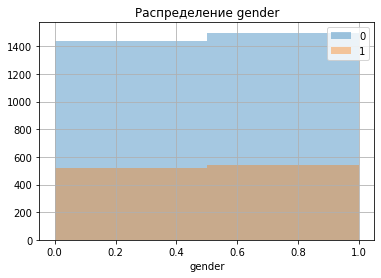

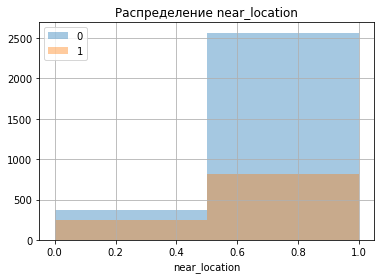

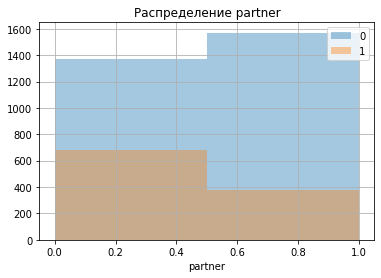

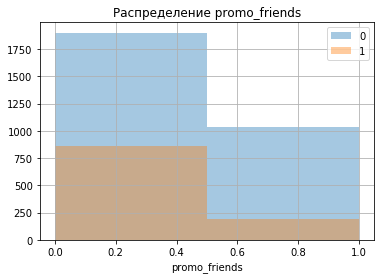

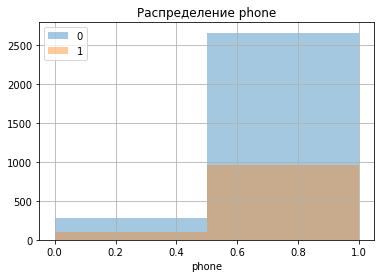

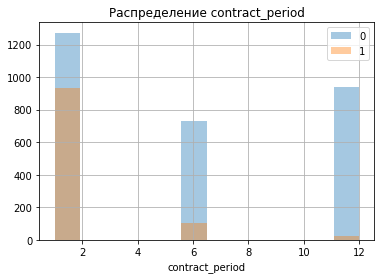

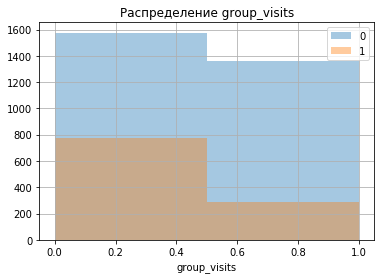

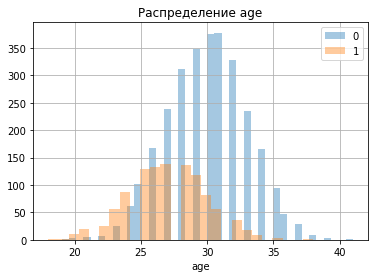

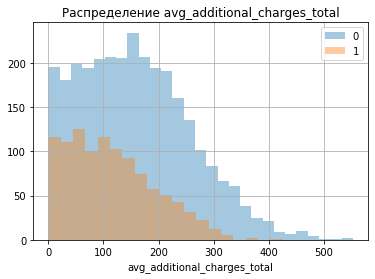

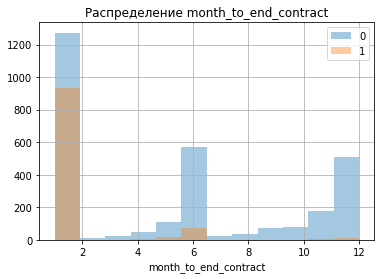

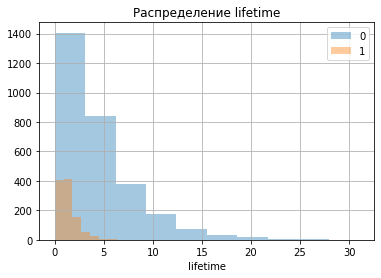

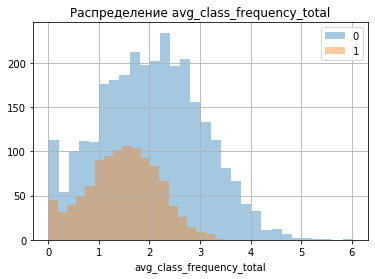

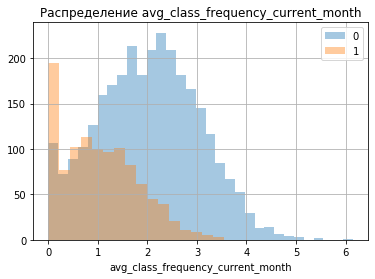

In [10]:
for name in X.columns:
    sns.distplot(data_churn_0[name],bins=binq[i],kde=False,label='0')
    sns.distplot(data_churn_1[name],bins=binq[i],kde=False,label='1')
    i+=1
    plt.grid()
    plt.title('Распределение '+name)
    plt.legend()
    plt.show()

У большинства ушедших контракт был на 1 месяц. Очень мало людей берут контракт на несколько месяцев и пропадают. Видим, что за предыдущий месяц они начинают ходить меньше в финтес-клуб и очень много нулевых значений. Обычно уходят новые пользователи с коротним временем жизни(те, кто ходил больше 5 месяцев, чаще остаются).  
Рассмотрим матрицу корреляций

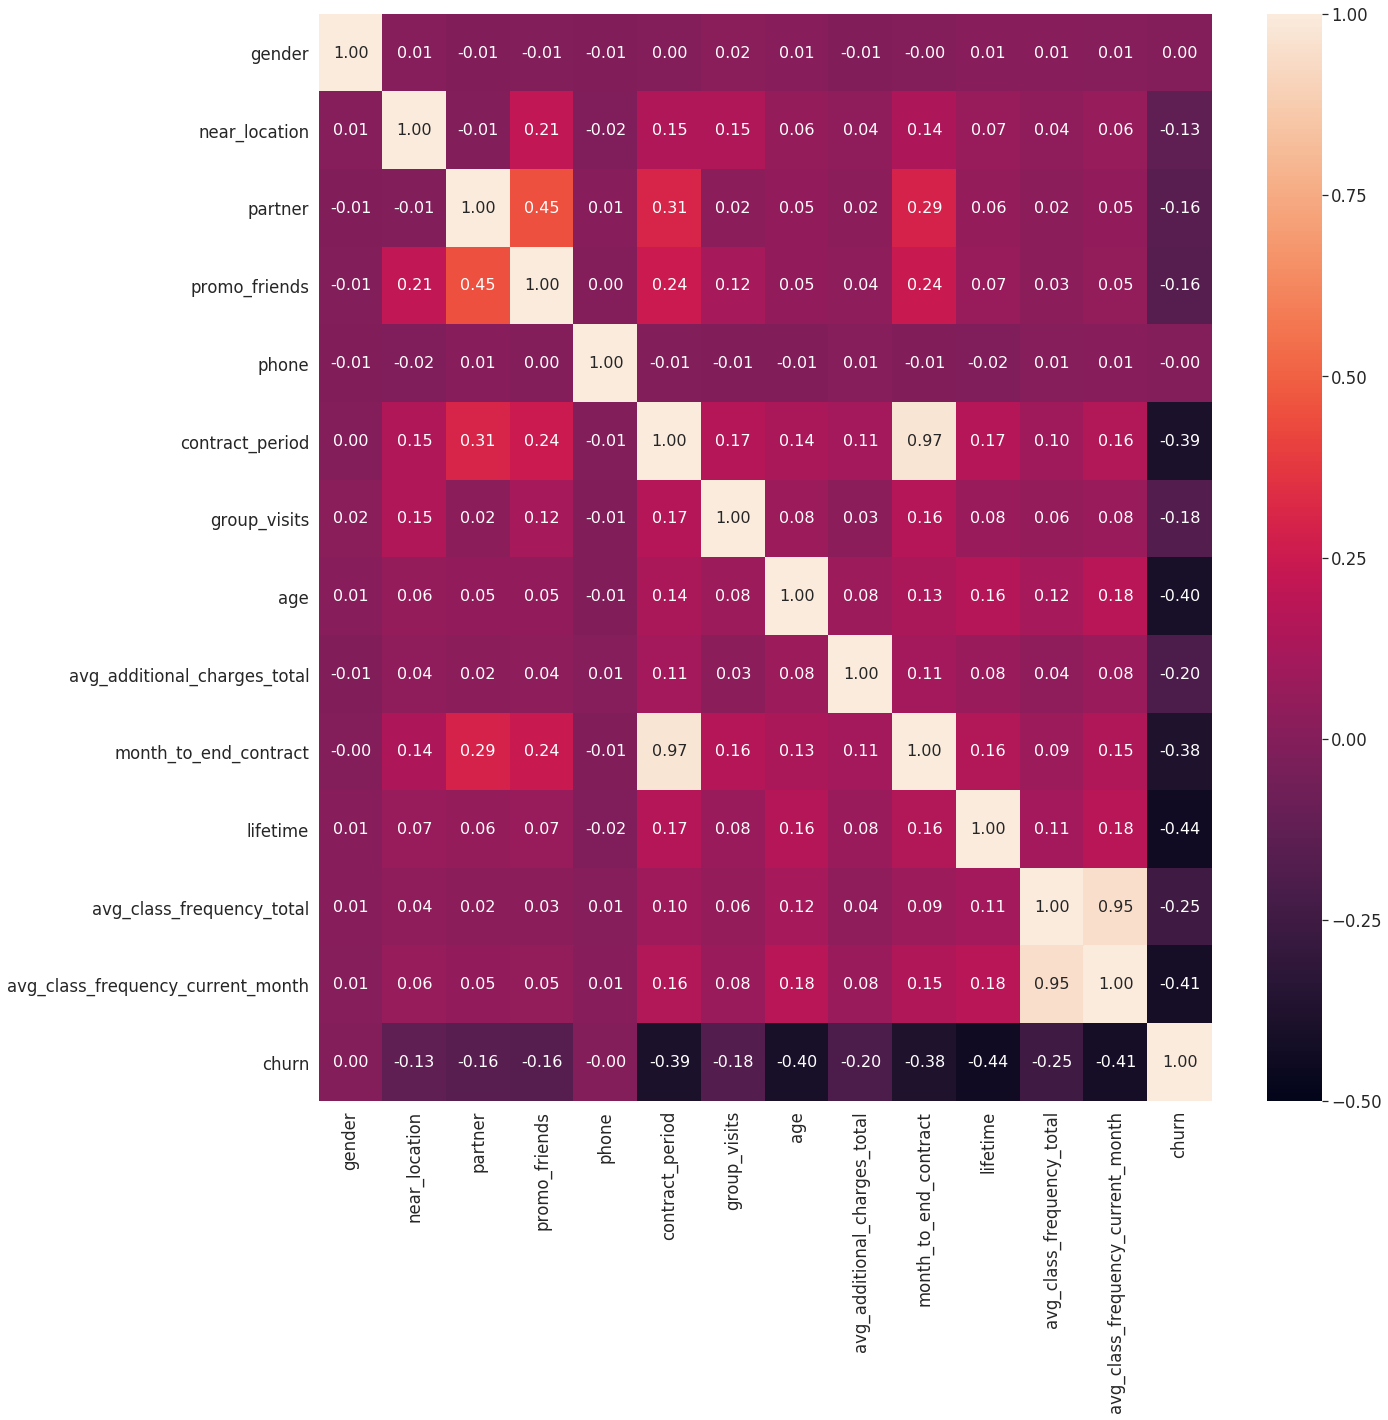

In [11]:
cm=data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt='.2f',vmin=-0.5,annot_kws={"size": 16});

Из признаков являются сильно коррелирующими только длительность контракта с временем до конца контракта и частота посещений. Это понятно, потому что фактически они показывают одно и тоже. Можно было бы убрать, но в данном проекте это некритично. Остальные корреляции в пределах нормы.  
#### Вывод 
Из проведенного анализа можно сделать вывод, что у ушедших посетителей не хватает заинтересованности часто ходить и продлевать контракт. Они ходят заметно меньше лояльных пользователей. Очень мало пользователей берут длинный контракт и пропадают. После 5-6 месяцев лояльности посетители с большой долей вероятности не перестанут ходить. Средний возраст ушедних немного меньше с.в лояльных.

## 3. Модель прогнозирования оттока клиентов
<a name='3'></a>

Обучим две модели предсказания и выделим из них лучшую. Будем использовать:
- Логическую регрессию
- Случайный лес  

Выделим обучающую выборку и валидационную и стандартизируем их

In [12]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

Напишем функцию обучения и подсчета метрик модели

In [13]:
def train_model(m):
    print(m)
    model=m
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    print('Accuracy',accuracy_score(y_test,y_pred), 
         '\nRecall',recall_score(y_test,y_pred),
         '\nPrecision',precision_score(y_test,y_pred),'\n')

In [14]:
for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.9225 
Recall 0.8282828282828283 
Precision 0.8541666666666666 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.905 
Recall 0.7525252525252525 
Precision 0.8465909090909091 



#### Вывод
По всем метрикам логическая регрессия оказалась лучше на валидационной выборке, для предсказания оттока лучше всего использовать ее. 

## 4. Кластеризация клиентов
<a name='4'></a>

Проведем кластеризацию пользователей по признакам, стнандартизируем их и построим дендограмму. 

In [15]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(data.drop(columns='churn'))

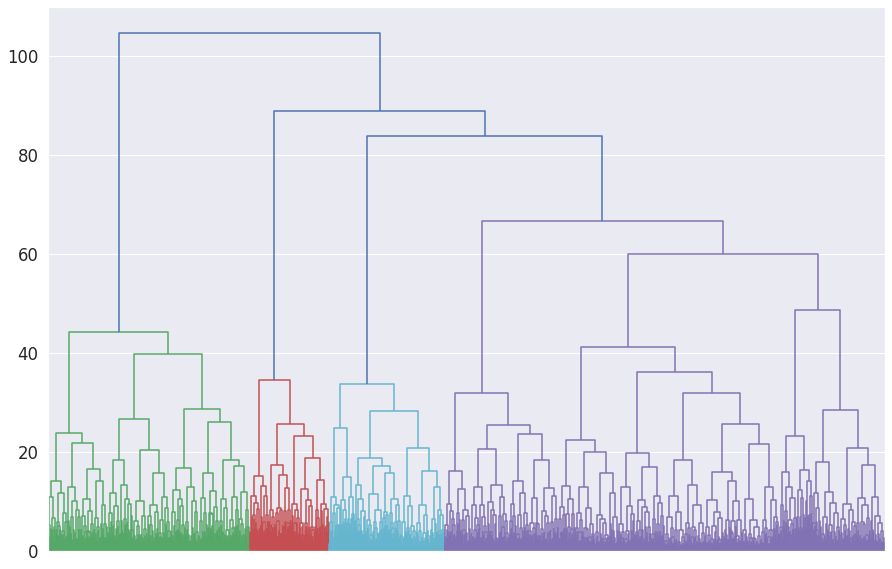

In [16]:
linked=linkage(X_sc,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',no_labels=True)
plt.show()

Можно заметить, что этот метод кластеризации выделил 4 кластера. Испольузем метод k-средних для выделения 5 кластеров.

In [17]:
n=5
km = KMeans(n_clusters = n, init='k-means++') 
labels = km.fit_predict(X_sc) 

In [18]:
data['clusters']=labels
data.groupby('clusters').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.483974,1.000000,0.353365,0.239583,1.0,1.963141,0.341346,28.179487,131.393110,1.870192,2.406250,1.237070,1.001342,0.516026
1,0.563314,0.976331,0.350296,0.230769,1.0,2.585799,0.471006,30.074556,161.047741,2.386982,4.906509,2.829702,2.825174,0.073373
2,0.496047,0.000000,0.462451,0.079051,1.0,2.371542,0.217391,28.476285,135.404537,2.217391,2.816206,1.659219,1.476397,0.442688
3,0.500493,0.960591,0.782266,0.573399,1.0,10.882759,0.541872,29.988177,161.115188,9.944828,4.733005,1.995889,1.988918,0.027586
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


У кластера с самым большим оттоком наименьшая длительность контракта, да и все остальные признаки заметно меньше. Кластеры с большой долей оттока реже остальных ходят в зал и среднее время жизни заметно меньше. Выделяется класер с нулевой близостью. Таким пользователям не хватает мотивации ездить далеко в фитнес-клуб, и они уходят.  
*_вопрос по оформлению, как мне описывать кластеры по номерам, если каждый раз модель переобучается и выдает немного другие кластеры?* 

In [19]:
sns.set(font_scale=1)
clusters=[]
for number in data['clusters'].unique():
    clusters.append([data.query('clusters==@number'),number])


Рассмотрим распределение признаков для каждого кластера

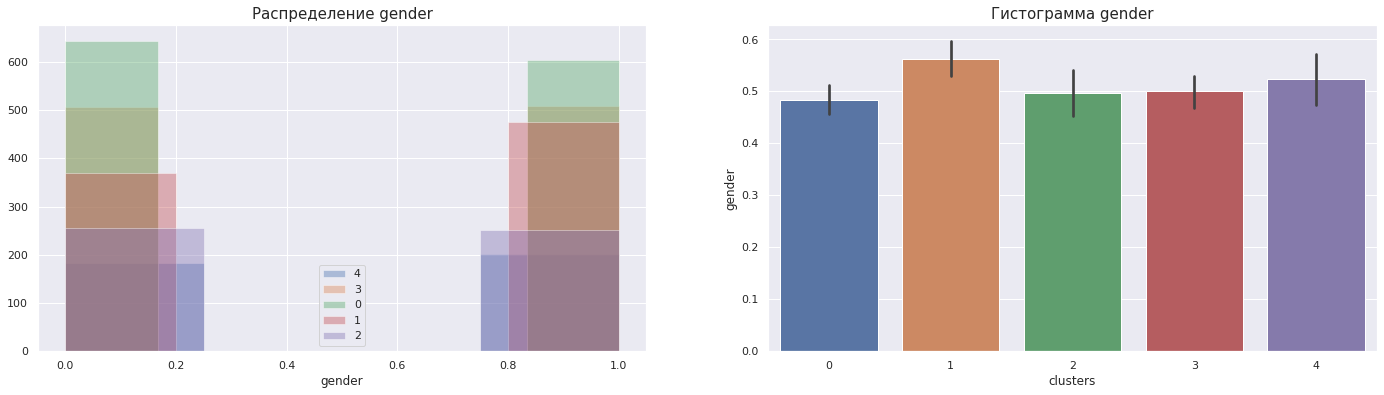

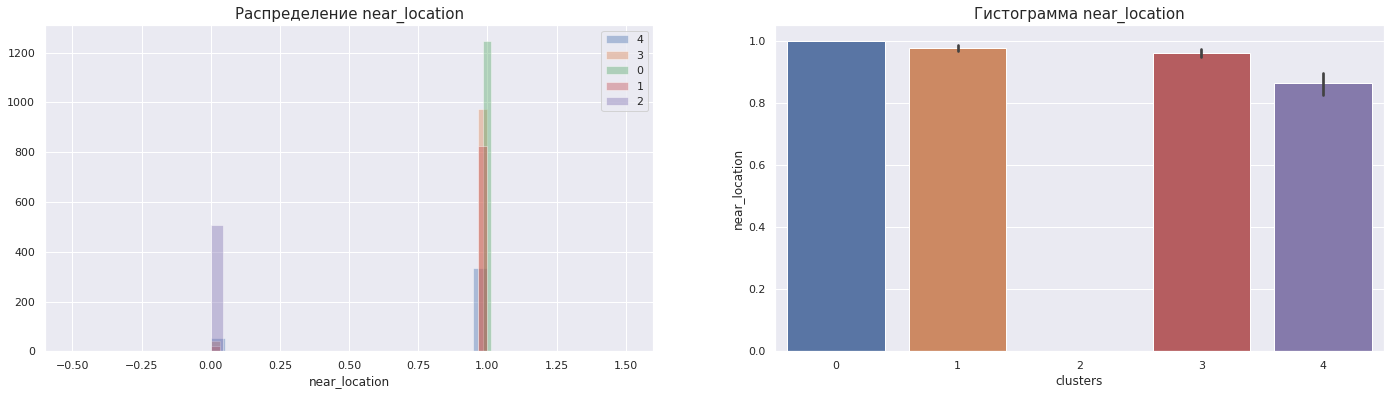

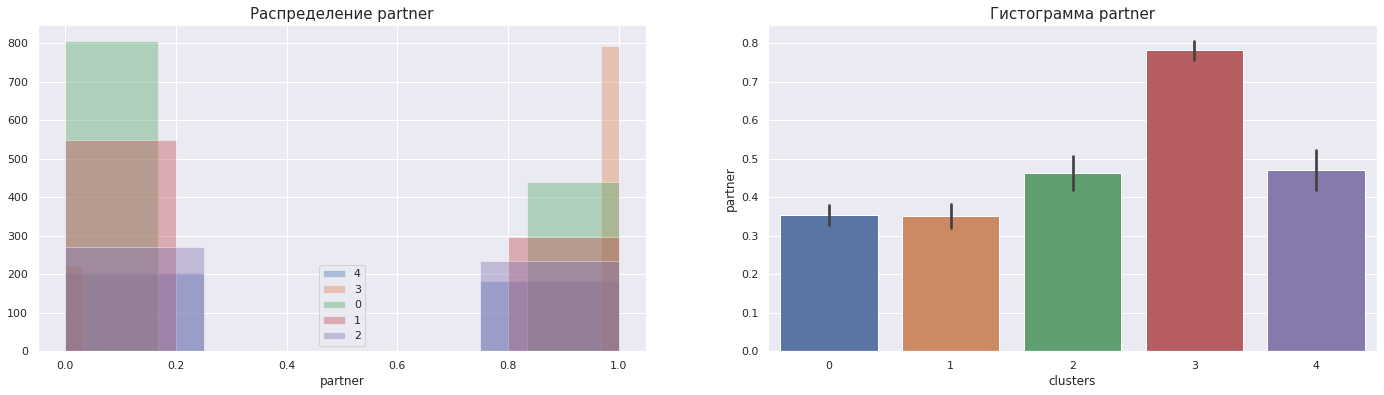

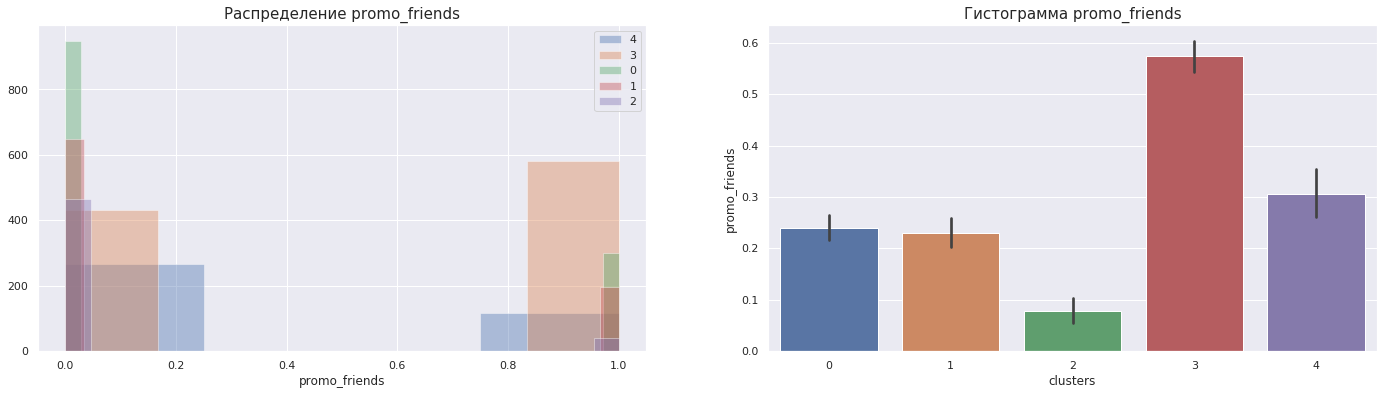

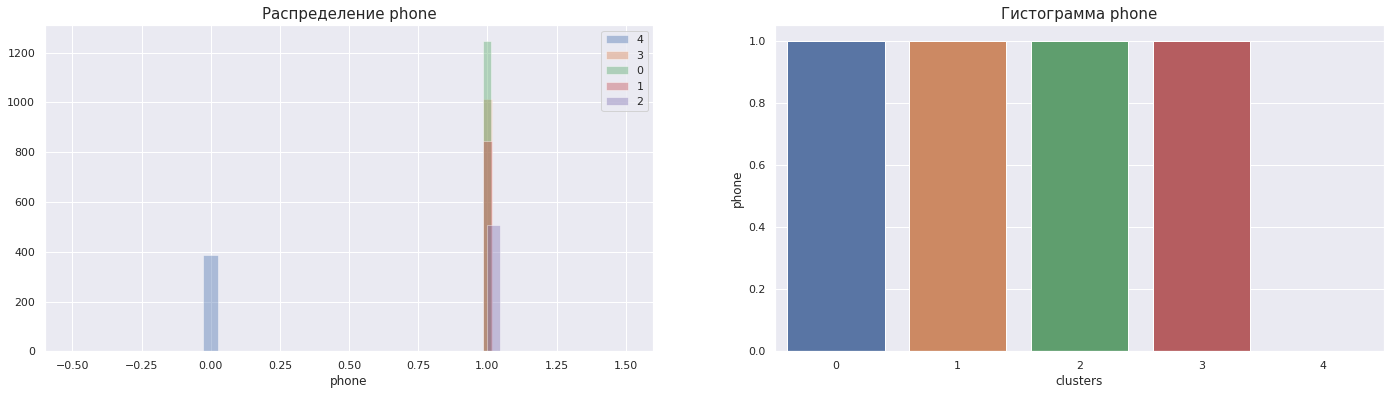

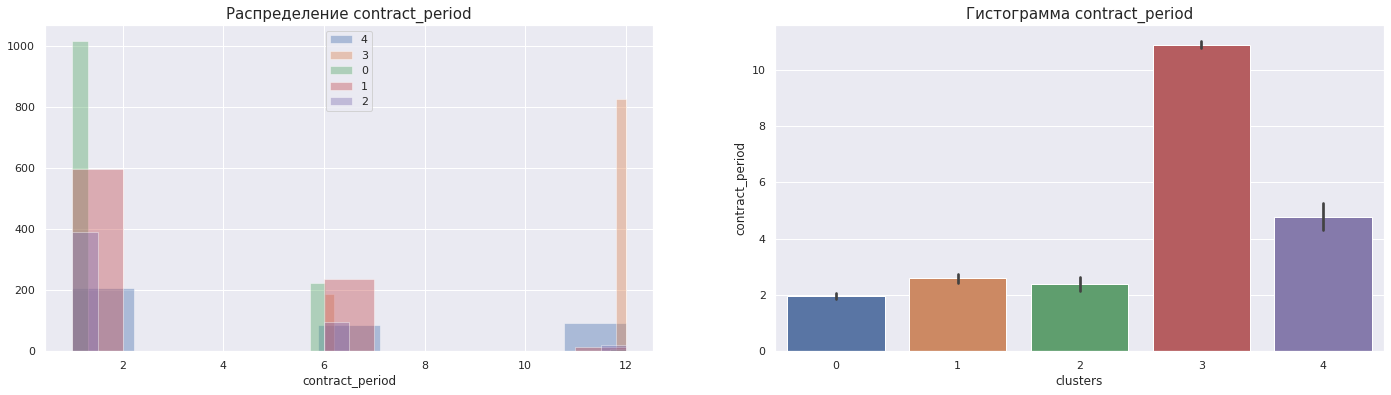

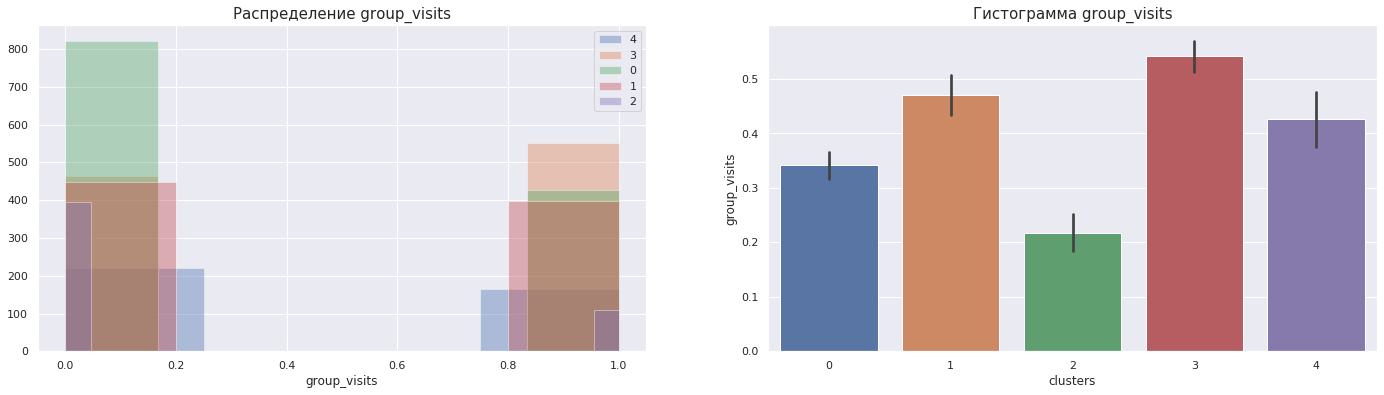

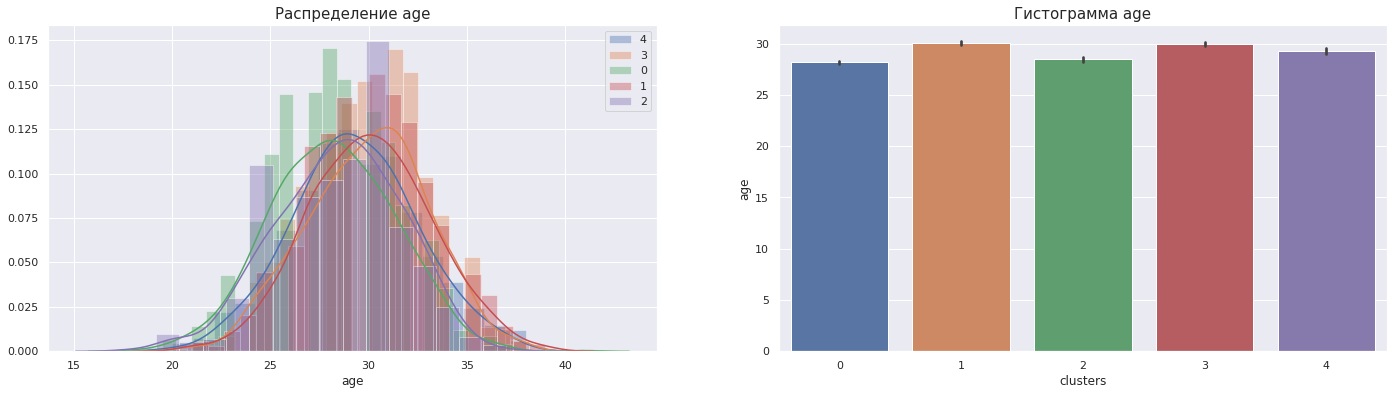

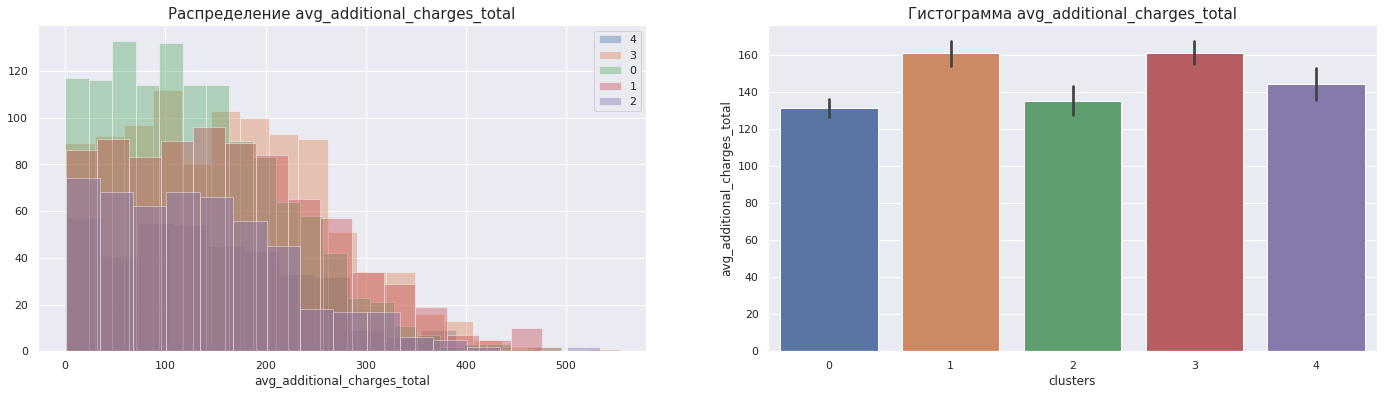

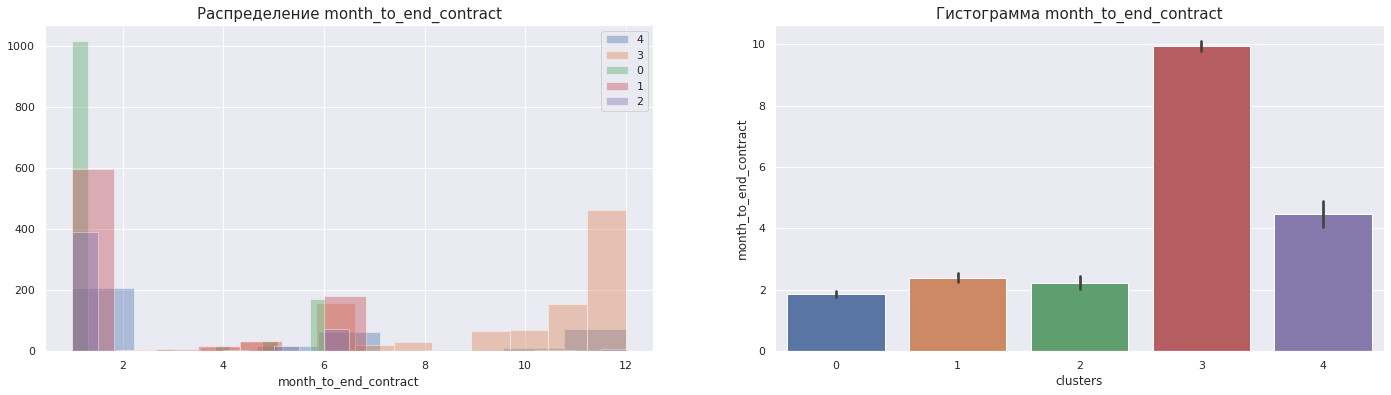

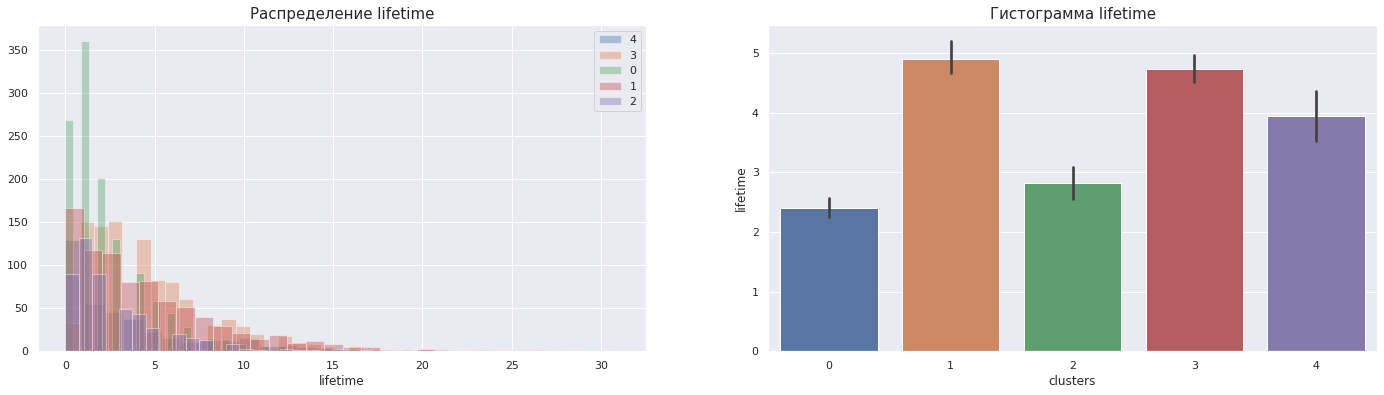

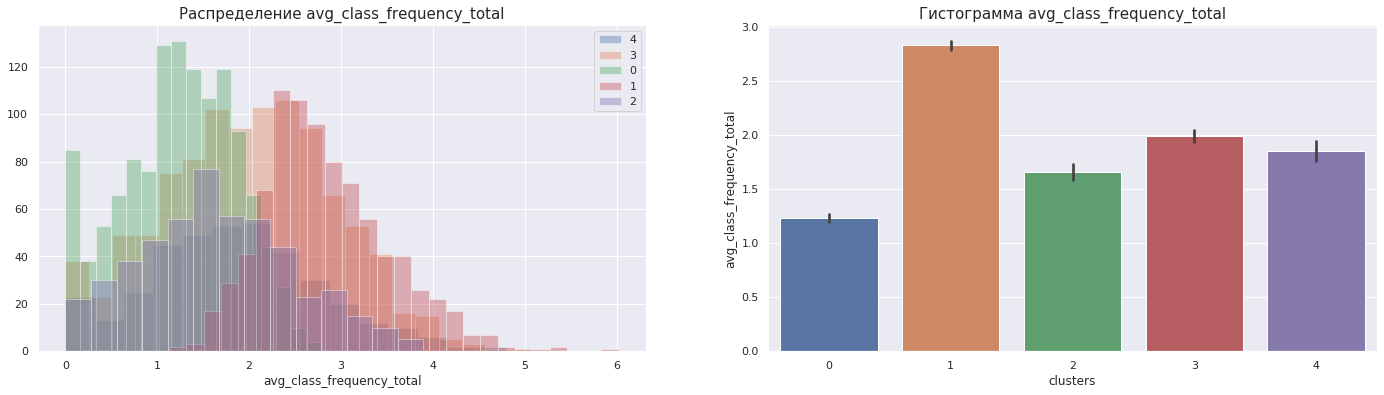

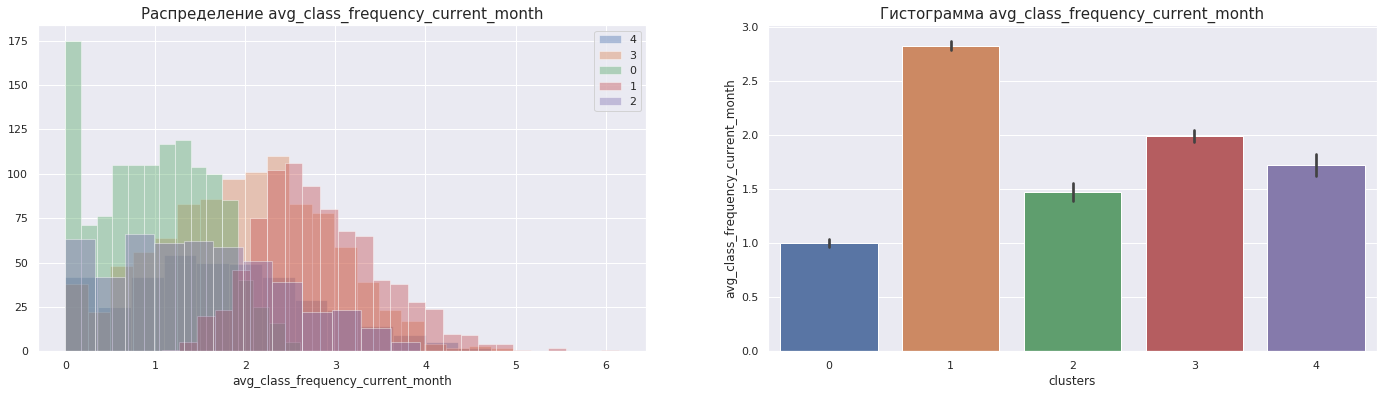

In [20]:
for name in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(24,6))
    for element in clusters:
        if name=='age':
            sns.distplot(element[0][name],kde=True,label=element[1],ax=ax[0])
        else:
            sns.distplot(element[0][name],kde=False,label=element[1],ax=ax[0])
    ax[0].legend()
    ax[0].set_title('Распределение '+name,fontsize=15)
    sns.barplot(data=data,x='clusters',y=name,ax=ax[1])
    ax[1].set_title('Гистограмма '+name,fontsize=15)

    plt.show()

На графиках посещения фитнес-центра видно, что кластеры с большим оттоком посещают зал реже. У многих из этих кластеров заканчивается контракт. Некоторые перестают ездить из-за расстояния. Остальные графики только подтвержают выводы из таблицы средних   

In [21]:
data.groupby('clusters').agg({'churn':'mean'})

,churn
clusters,
0,0.516026
1,0.073373
2,0.442688
3,0.027586
4,0.266839


#### Вывод 
Многие ушедшие пользователи не перестают ходить разом, но их посещение заметно уменьшается. Не стоит рассчитывать на клиентов, которым долго добираться до зала(с этим ничего не сделать). Многие пользователи покупают абонемент на месяц и после этого не продлевают его. Незаинтересованные пользователи менее активны, хотя тратят примерно столько же. С помощью кластеризации у нас получилось выделить 5 кластеров. Среди них есть кластеры с большой вероятностью оттока, но и почти с нулевой вероятностью оттока.

## Вывод и рекомендации
<a name='5'></a>

В исследовательском анализе мы увидели, что средние показатели лояльных и ушедших пользователей достаточно сильно отличаются (ушедшие менее активны). Заметили, что у многих ушедших контракт был всего на 1 месяц, и они не стали его продлевать.Очень мало пользователей берут долгий контракт и пропадают. После 5-6 месяцев лояльности посетители с большой долей вероятности не перестанут ходить. Средний возраст ушедних немного меньше с.в лояльных.   
Мы обучили две модели 1) логическая регрессия 2) случайный лес. Логическая регрессия оказалась на валидационной выборке лучше по всем метрикам, поэтому я рекомендую ее для использования.   
В работе приведена кластеризация посетителей на 5 кластеров. При их анализе мы увидели, что некоторые пользователи перестают ходить в силу удаленности фитнес-центра, у некоторых просто нехватает мотивации продлевать контракт  

Возможно, получится уменьшить отток пользователей тем, что убрать месячные контракты. Да, покупателей станет меньше, однако после 5-6 месяц времени жизни пользователи становятся лояльными и уже вряд ли уйдут. Тем самым можно будет сильно уменьшить долю оттока. Можно попробовать изменения, повышающие интерес посетителей, однако это будет не так действенно.